#0.Preparation of data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
covid_data = pd.read_csv('Covid Dataset.csv')
le = LabelEncoder()
for column in covid_data.columns:
  le.fit(covid_data[column])
  covid_data[column] = le.transform(covid_data[column])

# Extract X and Y from the dataset
X_total = covid_data.iloc[:, 0:20].values
y_total = covid_data.iloc[:,20].values


#SPLIT THE DATA INTO TRAIN AND TEST DATA
#70-30 train-test splitting is enough
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size = 0.3, random_state = 0)

#1.Dimensionality Reduction



##1.PCA



In [ ]:
import numpy as np
def calculate_covariance_matrix(X, Y=None):
    """ Calculate the covariance matrix for the dataset X """
    if Y is None:
        Y = X
    temp = np.ones((X.shape[0],1))
    one_arr = np.dot(temp, temp.T)
    n_samples = np.shape(X)[0]
    z = np.dot(one_arr, X)/n_samples
    temp2 = X - z
    covariance_matrix = (1 / (n_samples-1)) * np.dot(temp2.T, temp2)
    return  covariance_matrix

class PCA_():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis. This class is also used throughout
    the project to plot data.
    """
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors =  np.linalg.eigh(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1][:n_components]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:,idx]

        # Project the data onto principal components
        X_transformed = np.dot(X, eigenvectors)
        # PCA = np.dot(X_, eigenvectors[:,:n_components])
        return X_transformed

In [ ]:
from sklearn.decomposition import PCA
my_pca = PCA_()
sk_pca = PCA(n_components=2, random_state=0)

In [ ]:
pca1 = my_pca.transform(X_train, 2)
pca2 = sk_pca.fit_transform(X_train)

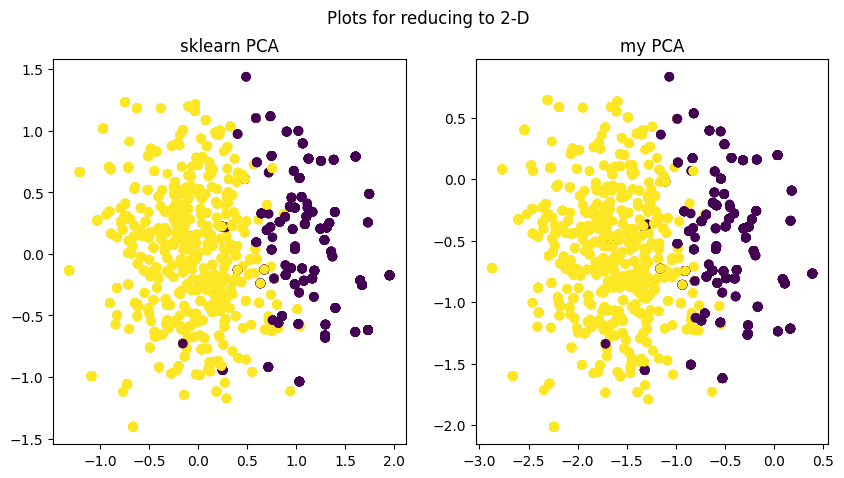

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(pca2[:, 0],
               pca2[:, 1],
               c=y_train)
ax[0].set_title("sklearn PCA")
ax[1].scatter(pca1[:, 0],
                pca1[:, 1],
                c=y_train)
ax[1].set_title("my PCA")
fig.suptitle(f"Plots for reducing to {2}-D")
plt.show()

##2.t-SNE



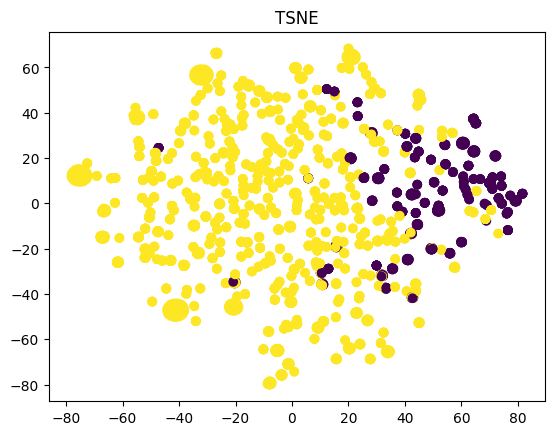

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2).fit_transform(X_train)
plt.scatter(tsne[:, 0].reshape(-1,1),
                tsne[:, 1].reshape(-1,1),
                c=y_train)
plt.title("TSNE")
plt.show()

##3.SVD



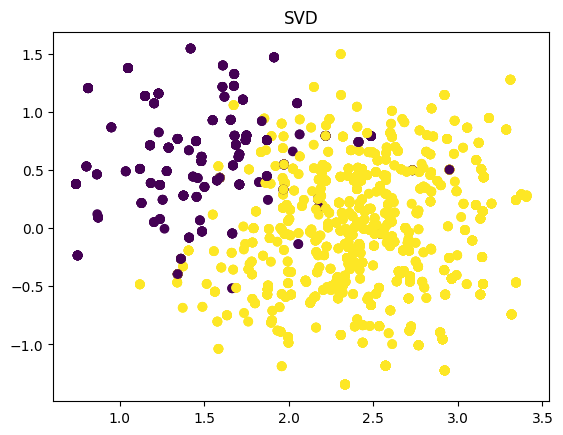

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_ = TruncatedSVD(n_components=2).fit(X_train)
svd = svd_.transform(X_train)
plt.scatter(svd[:, 0].reshape(-1,1),
                svd[:, 1].reshape(-1,1),
                c=y_train)
plt.title("SVD")
plt.show()

##4.LDA



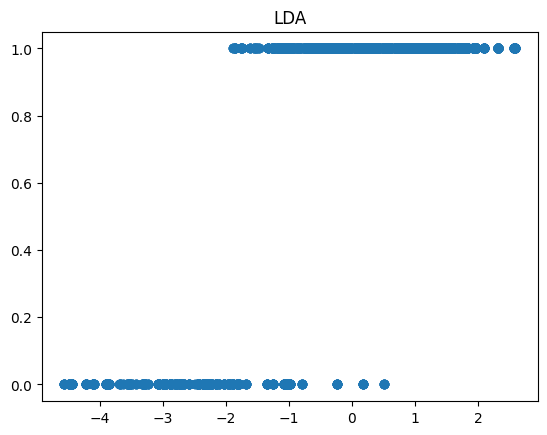

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_ = LinearDiscriminantAnalysis()
lda = lda_.fit(X_train, y_train).transform(X_train)
plt.scatter(lda[:, 0].reshape(-1,1), y_train)
plt.title("LDA")
plt.show()

##5.Isomap Embedding



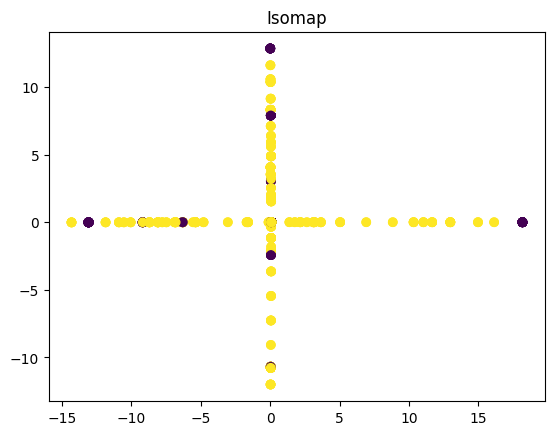

In [ ]:
from sklearn.manifold import Isomap
isomap_ = Isomap(n_components=2)
iso = isomap_.fit_transform(X_train)
plt.scatter(iso[:, 0].reshape(-1,1),
                iso[:, 1].reshape(-1,1),
                c=y_train)
plt.title("Isomap")
plt.show()

##6.Locally Linear Embedding



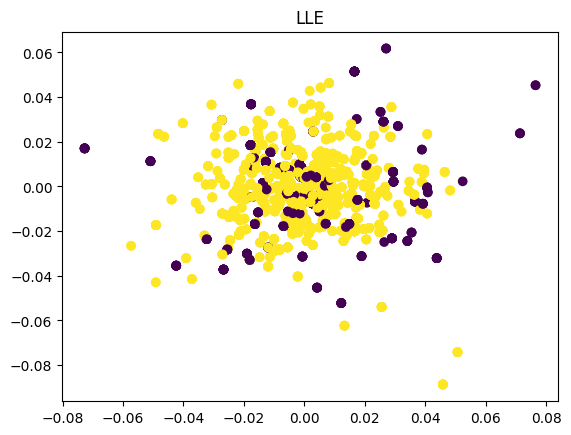

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=150, n_components=2)
lle_transformed = model.fit_transform(X_train)
plt.scatter(lle_transformed[:, 0].reshape(-1,1),
                lle_transformed[:, 1].reshape(-1,1),
                c=y_train)
plt.title("LLE")
plt.show()

##7.Modified Locally Linear Embedding



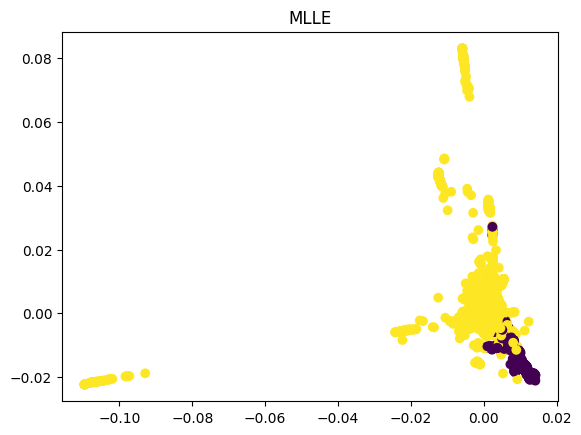

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=150, n_components=2, method='modified')
mlle_transformed = model.fit_transform(X_train)
plt.scatter(mlle_transformed[:, 0].reshape(-1,1),
                mlle_transformed[:, 1].reshape(-1,1),
                c=y_train)
plt.title("MLLE")
plt.show()

##8.Kernel Principal component analysis (KPCA)

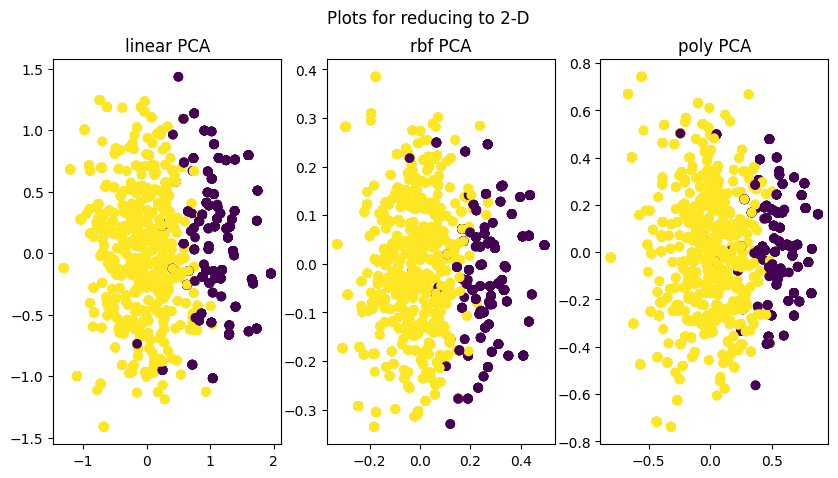

In [ ]:
##Apply KPCA on Covid dataset using different kernels(rbf,linear,poly)
from sklearn.decomposition import KernelPCA

model = KernelPCA(n_components=2, kernel='rbf')
rbf = model.fit_transform(X_train)

model1 = KernelPCA(n_components=2, kernel='linear')
linear = model1.fit_transform(X_train)

model1 = KernelPCA(n_components=2, kernel='poly')
poly = model1.fit_transform(X_train)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].scatter(linear[:, 0],
               linear[:, 1],
               c=y_train)
ax[0].set_title("linear PCA")
ax[1].scatter(rbf[:, 0],
                rbf[:, 1],
                c=y_train)
ax[1].set_title("rbf PCA")
ax[2].scatter(poly[:, 0],
                poly[:, 1],
                c=y_train)
ax[2].set_title("poly PCA")
fig.suptitle(f"Plots for reducing to {2}-D")
plt.show()

##9.Univariate statistical tests



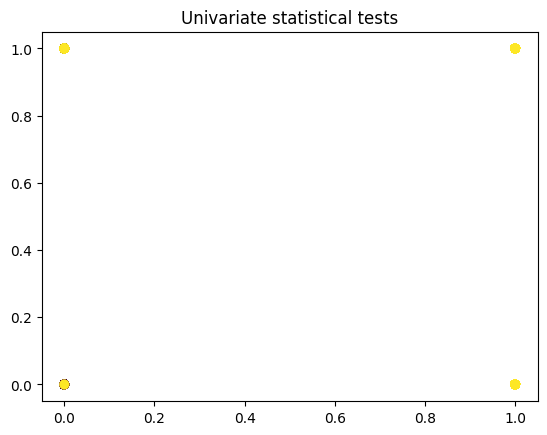

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sb = SelectKBest(chi2, k=2).fit_transform(X_train, y_train)
plt.scatter(sb[:, 0].reshape(-1,1),
                sb[:, 1].reshape(-1,1),
                c=y_train)
plt.title("Univariate statistical tests")
plt.show()

##10.DNN as nonlinear dimensionality reduction method


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

In [ ]:
# Layers
input_dim = X_train.shape[1]
encoding_dim = 2
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(16, activation="tanh")(input_layer)
encoder_layer_2 = Dense(12, activation="tanh")(encoder_layer_1)
encoder_layer_3 = Dense(8, activation="tanh")(encoder_layer_2)
encoder_layer_4 = Dense(4, activation="tanh")(encoder_layer_3)
encoder_layer_5 = Dense(encoding_dim, activation="tanh")(encoder_layer_4)

In [ ]:
# Model
encoder = Model(inputs=input_layer, outputs=encoder_layer_5)
encoded_data = np.array(encoder.predict(X_train))

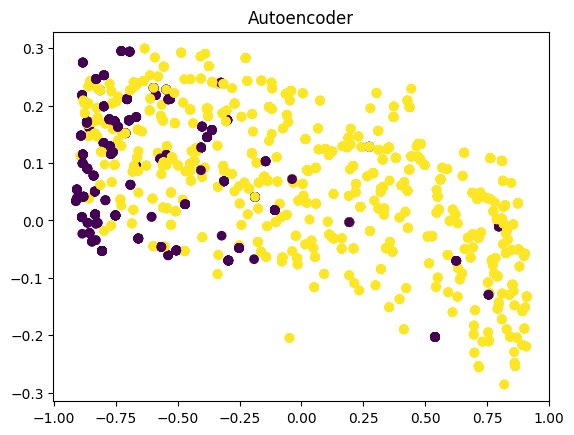

In [ ]:
# Plot model
plt.scatter(encoded_data[:, 0],
                encoded_data[:, 1],
                c=y_train)
plt.title("Autoencoder")
plt.show()

#2.Clustering



###1.Implementing k-Means from scratch

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Defining our function
def kmeans(x,k, no_of_iterations):
    #Randomly choosing Centroids
    centroids = x[np.random.randint(x.shape[0], size=k)]

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = []
    for index in range (len(distances)):
      points.append(np.argmin(distances[index]))

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
      pre = centroids
      centroids = []
      for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            indices = [index for index, element in enumerate(points) if element == idx]
            temp_cent = np.average(x[indices], axis=0)
            centroids.append(temp_cent)
      distances = cdist(x, centroids ,'euclidean')
      points = []
      for index in range (len(distances)):
        points.append(np.argmin(distances[index]))
    return points

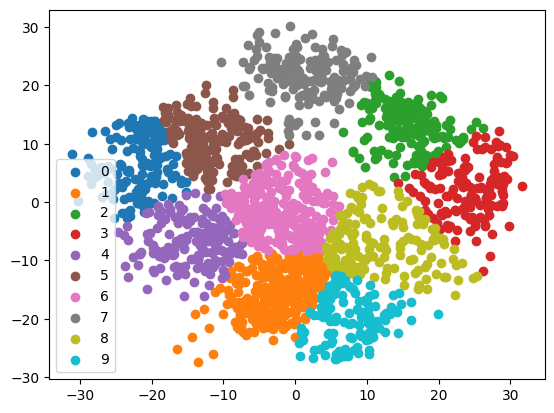

In [ ]:
###Don't change this cell
#Load Data
data = load_digits().data
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)

#Applying your function
label = kmeans(df,10,1000)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# accuracy of sklearn kmeans
from sklearn.metrics import accuracy_score
model = PCA_()
test_pca = model.transform(X_test, 2)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(pca1)
y_hat  = kmeans_test.predict(test_pca)
print("accuracy for MY pca      : ", accuracy_score(y_test, y_hat)*100, " % ")
model = PCA(n_components=2, random_state=0)
test_pca = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(pca2)
y_hat  = kmeans_test.predict(test_pca)
print("accuracy for Sklearn pca : ", accuracy_score(y_test, y_hat)*100, " % ")
tsne_test = TSNE(n_components=2).fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(tsne)
y_hat  = kmeans_test.predict(tsne_test)
print("accuracy for TSNE        : ", accuracy_score(y_test, y_hat)*100, " % ")
svd_test_ = TruncatedSVD(n_components=2).fit(X_test)
svd_test = svd_.transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(svd)
y_hat  = kmeans_test.predict(svd_test)
print("accuracy for SVD         : ", accuracy_score(y_test, y_hat)*100, " % ")
lda_test_ = LinearDiscriminantAnalysis()
lda_test = lda_.fit(X_total, y_total).transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(lda)
y_hat  = kmeans_test.predict(lda_test)
print("accuracy for LDA         : ", accuracy_score(y_test, y_hat)*100, " % ")
isomap_test = Isomap(n_components=2)
iso_test = isomap_test.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(iso)
y_hat  = kmeans_test.predict(iso_test)
print("accuracy for Isomap      : ", accuracy_score(y_test, y_hat)*100, " % ")
model = LocallyLinearEmbedding(n_neighbors=150, n_components=2)
lle_transformed_test = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(lle_transformed)
y_hat  = kmeans_test.predict(lle_transformed_test)
print("accuracy for LocallyLinearEmbedding : ", accuracy_score(y_test, y_hat)*100, " % ")
model = LocallyLinearEmbedding(n_neighbors=150, n_components=2, method='modified')
lle_transformed_test = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(lle_transformed)
y_hat  = kmeans_test.predict(lle_transformed_test)
print("accuracy for Modified LocallyLinearEmbedding         : ", accuracy_score(y_test, y_hat)*100, " % ")
model = KernelPCA(n_components=2, kernel='linear')
linear_test = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(linear)
y_hat  = kmeans_test.predict(linear_test)
print("accuracy for linear pca    : ", accuracy_score(y_test, y_hat)*100, " % ")
model = KernelPCA(n_components=2, kernel='rbf')
rbf_test = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(rbf)
y_hat  = kmeans_test.predict(rbf_test)
print("accuracy for rbf pca    : ", accuracy_score(y_test, y_hat)*100, " % ")
model = KernelPCA(n_components=2, kernel='poly')
poly_test = model.fit_transform(X_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(poly)
y_hat  = kmeans_test.predict(poly_test)
print("accuracy for ply pca    : ", accuracy_score(y_test, y_hat)*100, " % ")
sb_test = SelectKBest(chi2, k=2).fit_transform(X_test, y_test)
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(poly)
y_hat  = kmeans_test.predict(poly_test)
print("accuracy for Univariate statistical tests    : ", accuracy_score(y_test, y_hat)*100, " % ")
encoder_test = Model(inputs=input_layer, outputs=encoder_layer_5)
encoded_testdata = np.array(encoder_test.predict(X_test))
kmeans_test = KMeans(n_clusters=2, random_state=0, max_iter=50).fit(encoded_data)
y_hat  = kmeans_test.predict(encoded_testdata)
print("accuracy for Autoencoder   : ", accuracy_score(y_test, y_hat)*100, " % ")

accuracy for MY pca      :  75.78172900061311  % 
accuracy for Sklearn pca :  85.34641324340895  % 
accuracy for TSNE        :  35.928877988963826  % 
accuracy for SVD         :  80.9319435928878  % 
accuracy for LDA         :  92.27467811158799  % 
accuracy for Isomap      :  16.24770079705702  % 
accuracy for LocallyLinearEmbedding :  57.572041692213375  % 
accuracy for Modified LocallyLinearEmbedding         :  86.38871857755977  % 
accuracy for linear pca    :  85.16247700797057  % 
accuracy for rbf pca    :  79.33782955242182  % 
accuracy for ply pca    :  20.04904966278357  % 
accuracy for Univariate statistical tests    :  20.04904966278357  % 
accuracy for Autoencoder   :  63.82587369711833  % 


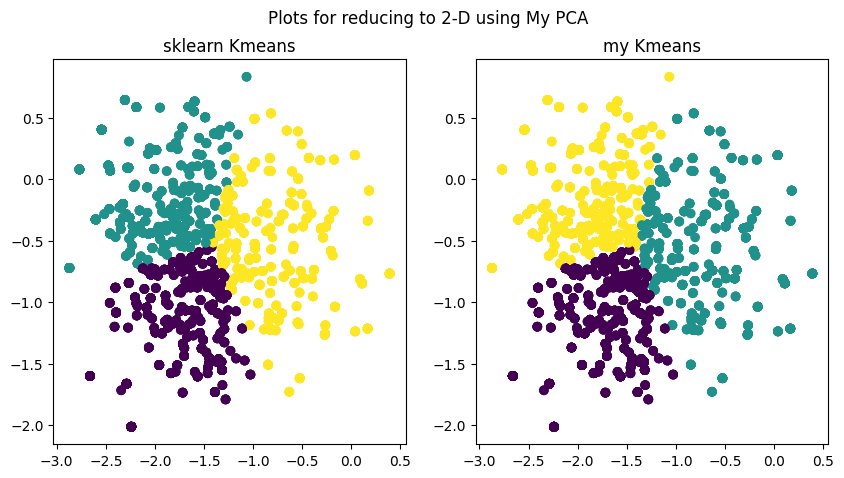

In [ ]:
my_kmeans = kmeans(pca1, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(pca1)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(pca1[:, 0],
               pca1[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(pca1[:, 0],
                pca1[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using My PCA")
plt.show()

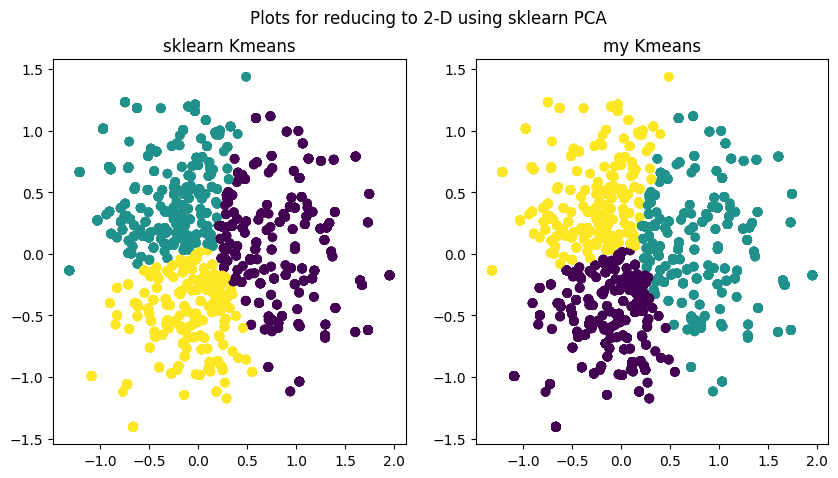

In [ ]:
y_kmeans = kmeans(pca2, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(pca2)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(pca2[:, 0],
               pca2[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(pca2[:, 0],
                pca2[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using sklearn PCA")
plt.show()

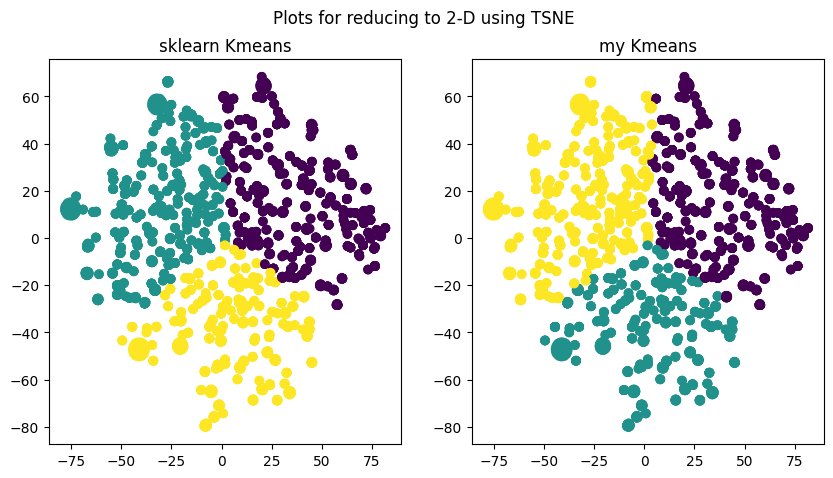

In [ ]:
my_kmeans = kmeans(tsne, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(tsne)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(tsne[:, 0],
               tsne[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(tsne[:, 0],
                tsne[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using TSNE")
plt.show()

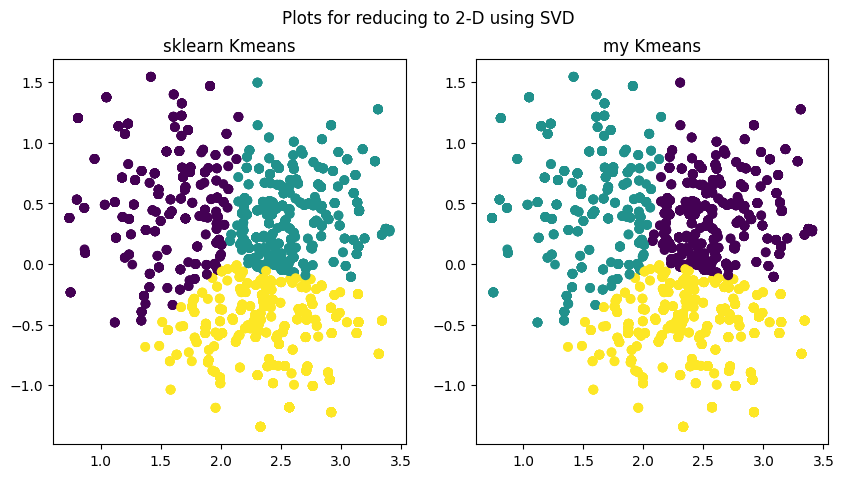

In [ ]:
my_kmeans = kmeans(svd, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(svd)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(svd[:, 0],
               svd[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(svd[:, 0],
                svd[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using SVD")
plt.show()

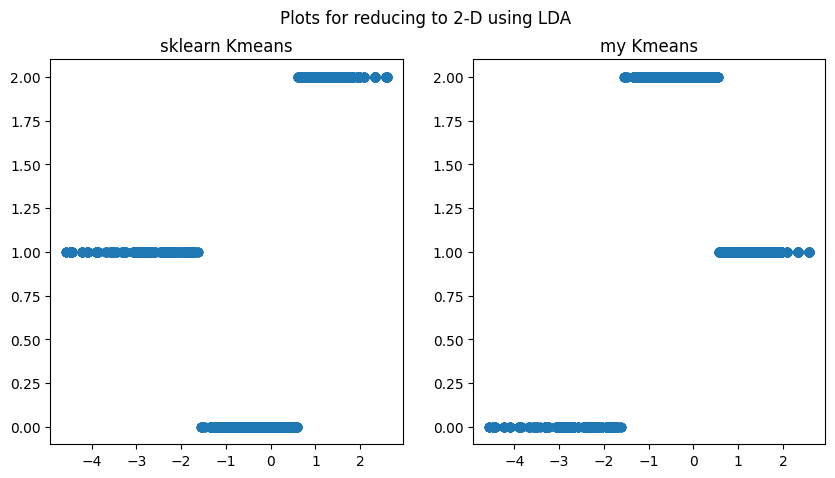

In [ ]:
my_kmeans = kmeans(lda, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(lda)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(lda[:, 0].reshape(-1,1), my_kmeans)

ax[0].set_title("sklearn Kmeans")
ax[1].scatter(lda[:, 0].reshape(-1,1), skl_kmeans)

ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using LDA")
plt.show()

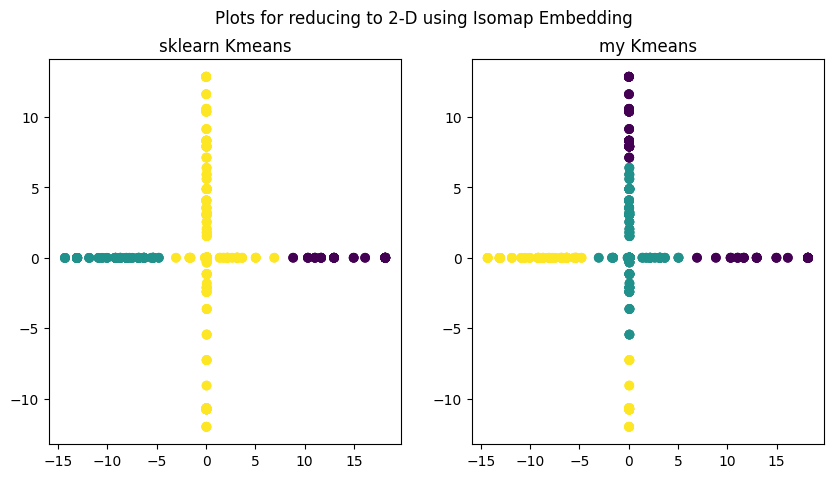

In [ ]:
my_kmeans = kmeans(iso, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(iso)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(iso[:, 0],
               iso[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(iso[:, 0],
                iso[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Isomap Embedding")
plt.show()

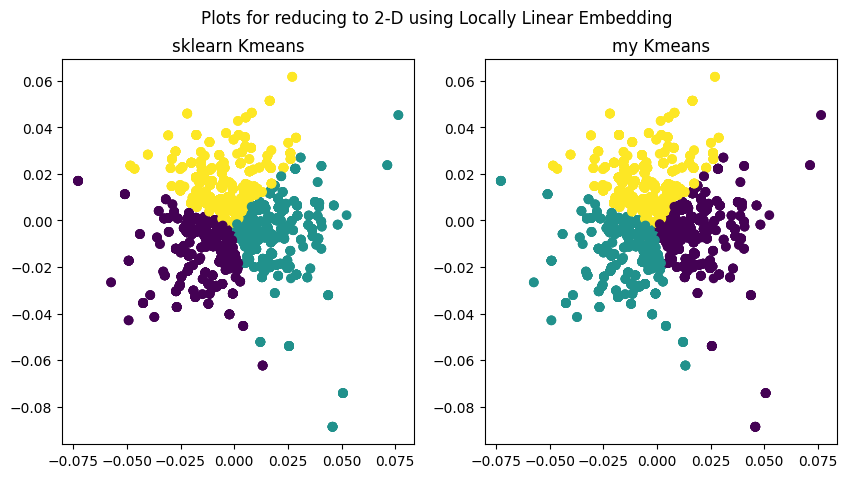

In [ ]:
my_kmeans = kmeans(lle_transformed, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(lle_transformed)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(lle_transformed[:, 0],
               lle_transformed[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(lle_transformed[:, 0],
                lle_transformed[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Locally Linear Embedding")
plt.show()

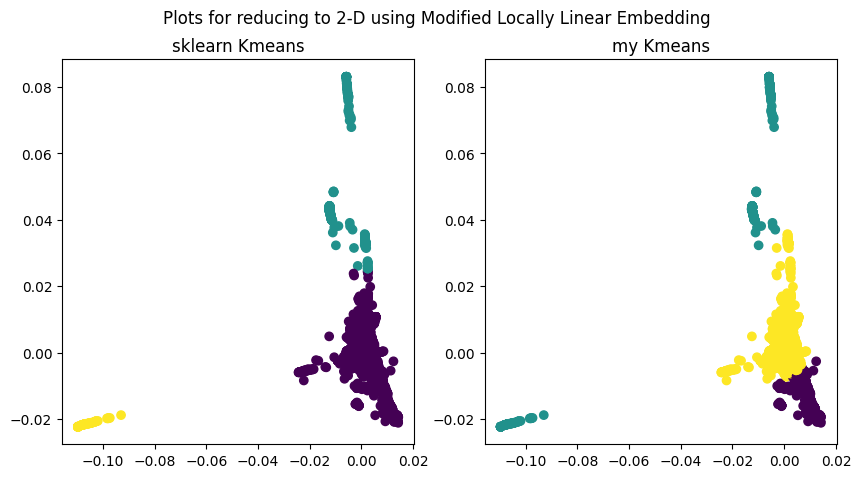

In [ ]:
my_kmeans = kmeans(mlle_transformed, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(mlle_transformed)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(mlle_transformed[:, 0],
               mlle_transformed[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(mlle_transformed[:, 0],
                mlle_transformed[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Modified Locally Linear Embedding")
plt.show()

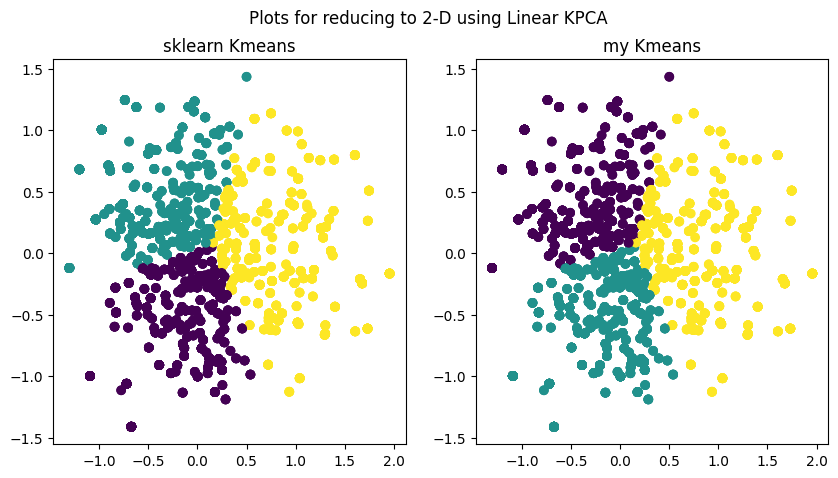

In [ ]:
my_kmeans = kmeans(linear, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(linear)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(linear[:, 0],
               linear[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(linear[:, 0],
                linear[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Linear KPCA")
plt.show()

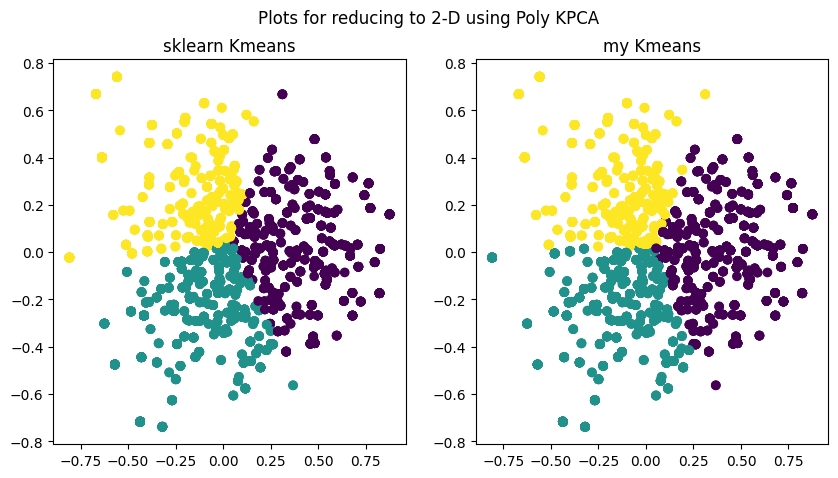

In [ ]:
my_kmeans = kmeans(poly, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(poly)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(poly[:, 0],
               poly[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(poly[:, 0],
                poly[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Poly KPCA")
plt.show()

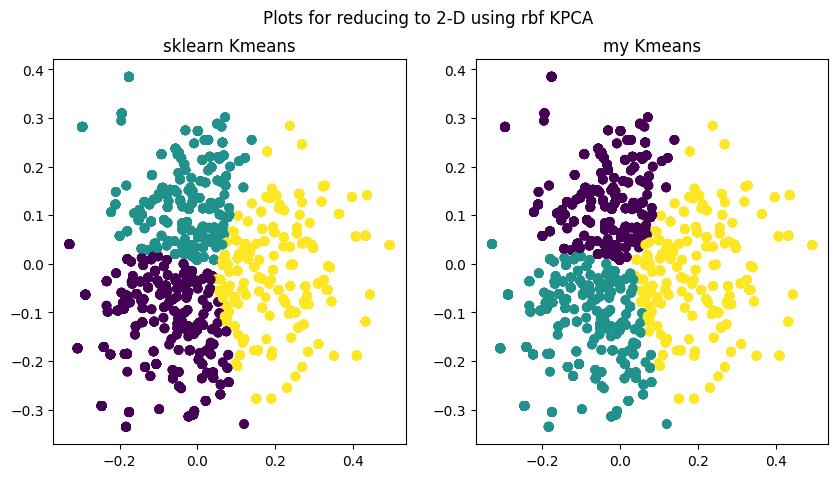

In [ ]:
my_kmeans = kmeans(rbf, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(rbf)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(rbf[:, 0],
               rbf[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(rbf[:, 0],
                rbf[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using rbf KPCA")
plt.show()

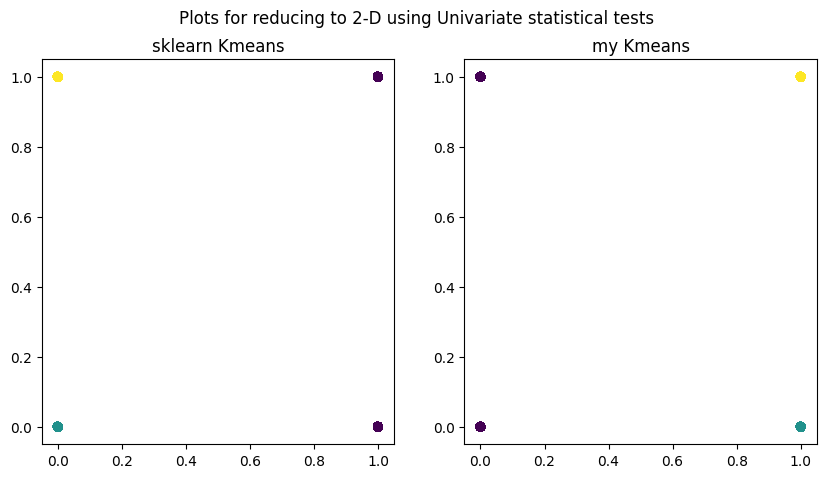

In [ ]:
my_kmeans = kmeans(sb, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(sb)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(sb[:, 0],
               sb[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(sb[:, 0],
                sb[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Univariate statistical tests")
plt.show()

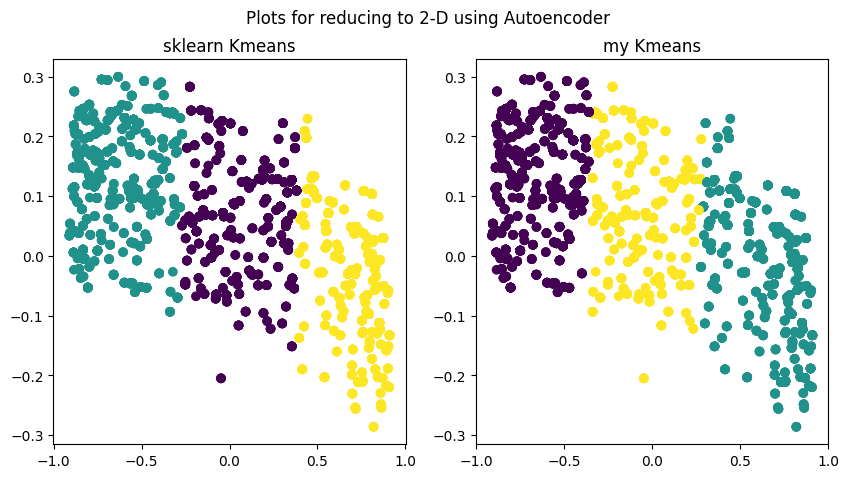

In [ ]:
my_kmeans = kmeans(encoded_data, 3, 50)
kmeans_ = KMeans(n_clusters=3, random_state=0, max_iter=50).fit(encoded_data)
skl_kmeans = kmeans_.labels_
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(encoded_data[:, 0],
               encoded_data[:, 1],
               c=skl_kmeans)
ax[0].set_title("sklearn Kmeans")
ax[1].scatter(encoded_data[:, 0],
                encoded_data[:, 1],
                c=my_kmeans)
ax[1].set_title("my Kmeans")
fig.suptitle(f"Plots for reducing to {2}-D using Autoencoder")
plt.show()

###2.k-Means Algorithm: Expectation–Maximization


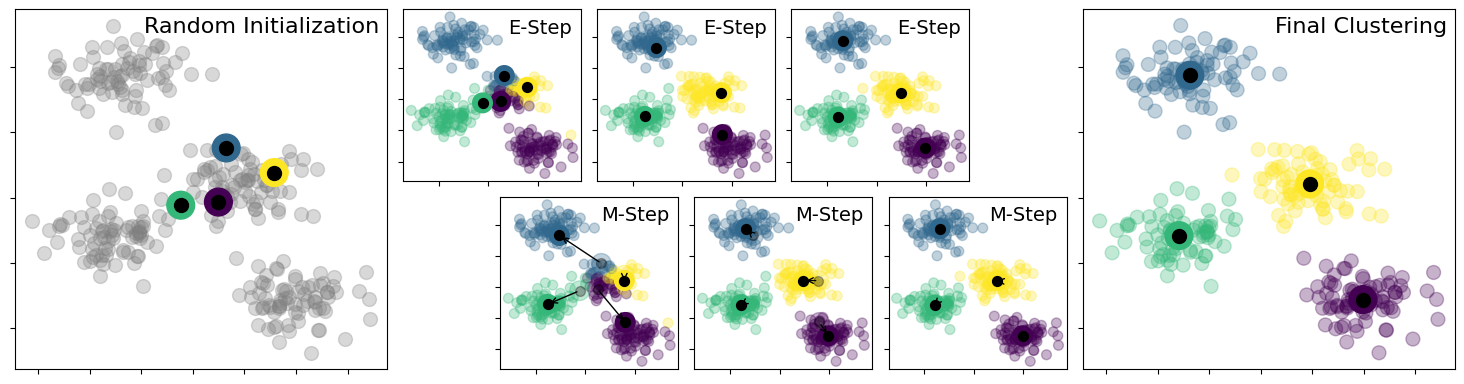

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin
import numpy as np
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)

def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)
###TODO###
for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])

    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)

    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))


    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
###TODO###
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.show('expectation-maximization.png')

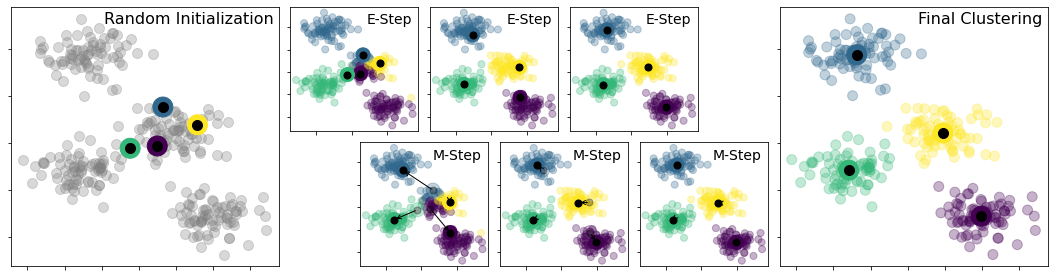

##2.DBSCAN



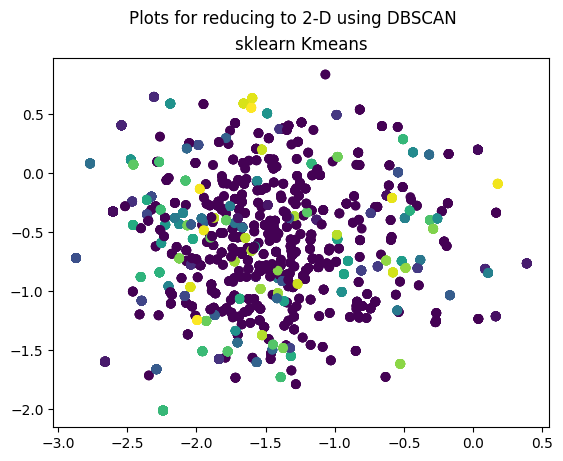

In [ ]:
##Apply DBSCAN on dimensionally reduced data
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.0005, min_samples=10).fit(pca1)
plt.scatter(pca1[:, 0],
               pca1[:, 1],
               c=clustering.labels_)
plt.title("sklearn Kmeans")
plt.suptitle(f"Plots for reducing to {2}-D using DBSCAN")
plt.show()

##3.Spectral clustering



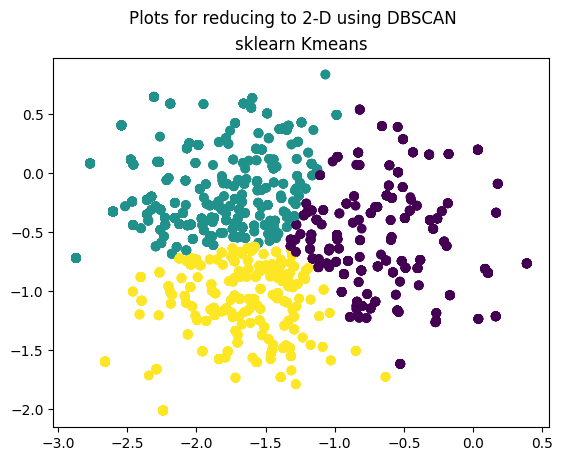

In [ ]:
##Apply Specteral clustering using SpectralClustering from scikit
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0).fit(pca1)
plt.scatter(pca1[:, 0],
               pca1[:, 1],
               c=clustering.labels_
)
plt.title("sklearn Kmeans")
plt.suptitle(f"Plots for reducing to {2}-D using DBSCAN")
plt.show()

##4.Agglomerative clustering



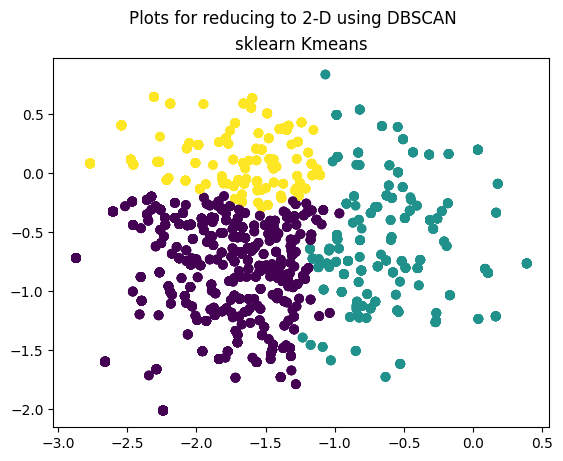

In [ ]:
##Apply hierarchical clustering using AgglomerativeClustering from scikit
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(pca1)
plt.scatter(pca1[:, 0],
               pca1[:, 1],
               c=clustering.labels_
)
plt.title("sklearn Kmeans")
plt.suptitle(f"Plots for reducing to {2}-D using DBSCAN")
plt.show()

##5.Clustering of a high-dimensional data



In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
!pip install GEOparse

In [ ]:
import GEOparse as G
gse = G.get_GEO(geo="GSE147930", destdir="./")
#DATASET:  https://ncbi.xyz/geo/query/acc.cgi?acc=GSE147930

20-May-2021 10:42:48 DEBUG utils - Directory ./ already exists. Skipping.
20-May-2021 10:42:48 INFO GEOparse - File already exist: using local version.
20-May-2021 10:42:48 INFO GEOparse - Parsing ./GSE147930_family.soft.gz: 
20-May-2021 10:42:48 DEBUG GEOparse - DATABASE: GeoMiame
20-May-2021 10:42:48 DEBUG GEOparse - SERIES: GSE147930
20-May-2021 10:42:48 DEBUG GEOparse - PLATFORM: GPL570
/usr/local/lib/python3.7/dist-packages/GEOparse/GEOparse.py:113: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
20-May-2021 10:42:50 DEBUG GEOparse - SAMPLE: GSM4450396
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: GSM4450397
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: GSM4450398
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: GSM4450399
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: GSM4450400
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: GSM4450401
20-May-2021 10:42:51 DEBUG GEOparse - SAMPLE: 

In [ ]:
c = []
for gsm_name, gsm in gse.gsms.items():
  c.append(gsm.table['ID_REF'])
  break
data = pd.DataFrame(columns=c[0])
d = []
for gsm_name, gsm in gse.gsms.items():
  d.append(gsm.table['VALUE'])
listOfSeries = []
for i in range(len(d)):
  listOfSeries.append(pd.Series(np.log2(np.array(d[i])), index=data.columns ))
data = data.append(  listOfSeries,
                        ignore_index=True)
name = []
for gsm_name, gsm in gse.gsms.items():
    name.append(gsm_name)
data.insert(loc=0, column='Name', value=name)
target = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
data.insert(loc=54675, column='patients', value=target)

In [ ]:
data.describe(include='all')

ID_REF,Name,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-DapX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-LysX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-PheX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-ThrX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-TrpnX-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-P1-cre-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-lys-3_at,...,1570569_at,1570571_at,1570572_at,1570574_at,1570575_at,1570578_at,1570579_at,1570584_at,1570585_at,1570587_at,1570588_at,1570592_a_at,1570593_at,1570594_at,1570596_at,1570597_at,1570600_at,1570601_at,1570607_at,1570618_at,1570621_at,1570622_at,1570623_at,1570624_at,1570625_at,1570627_at,1570628_at,1570629_at,1570630_at,1570631_at,1570632_at,1570633_at,1570635_at,1570639_at,1570644_at,1570645_at,1570650_at,1570651_at,1570653_at,patients
count,35,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
unique,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GSM4450416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.065455,9.495738,9.311929,10.257448,10.546925,11.572184,12.568341,13.759261,13.821169,8.914168,11.240831,11.803829,7.396682,8.376223,8.966649,7.763243,8.124005,8.757139,6.694791,8.272648,10.024520,4.277278,3.741123,4.084098,9.709385,9.781990,9.698585,11.036617,11.162369,12.839616,13.108494,14.308359,14.526877,9.460042,11.374472,12.205406,8.029156,8.265128,8.490026,...,6.008146,5.653357,4.208737,4.284484,3.976787,4.377878,4.177677,4.033344,5.916162,4.406047,5.863299,4.666983,3.973613,4.153901,4.308651,4.471548,5.309552,4.199964,5.605978,4.127572,4.432462,4.179964,4.889600,5.218506,5.370346,5.324749,3.865352,4.349744,4.987672,4.868857,4.235530,3.531616,4.800874,4.400715,4.539412,4.558014,4.970761,5.524820,4.382057,0.657143
std,NaN,0.843717,0.883584,0.926104,0.875850,0.840230,0.797122,0.693552,0.504812,0.440452,1.448264,1.160331,1.028145,1.233697,1.190301,1.076928,1.272930,1.177268,0.998096,1.009337,1.273606,1.203148,0.172591,0.164851,0.219306,0.848082,0.840386,0.869511,0.846280,0.827426,0.654564,0.615913,0.342110,0.335633,1.561349,1.159979,0.998669,1.31

In [ ]:
def variation_func (col):
  std_ = col.std()
  mean_ = col.mean()
  return std_ / mean_
p_data  = data[0:23]
idx_data = {}
for column in p_data.columns:
  if column == 'Name' or column == 'patients':
    continue
  idx_data[column] = variation_func(p_data[column])
sort_idx_data = dict(sorted(idx_data.items(), key=lambda item: item[1]))
els = list(sort_idx_data.items())[::-1]

In [ ]:
# select 2,10,50,1000 best features
# 2
idx_ = els[:2]
column_ = ['patients']
for i, j in idx_:
  column_.append(i)
data2_  = data[column_][:23]

# 10
idx_ = els[:10]
column_ = ['patients']
for i, j in idx_:
  column_.append(i)
data10_  = data[column_][:23]

# 50
idx_ = els[:50]
column_ = ['patients']
for i, j in idx_:
  column_.append(i)
data50_  = data[column_][:23]

# 1000
idx_ = els[:1000]
column_ = ['patients']
for i, j in idx_:
  column_.append(i)
data1000_  = data[column_][:23]

Text(0.5, 1.0, '2 Feature')

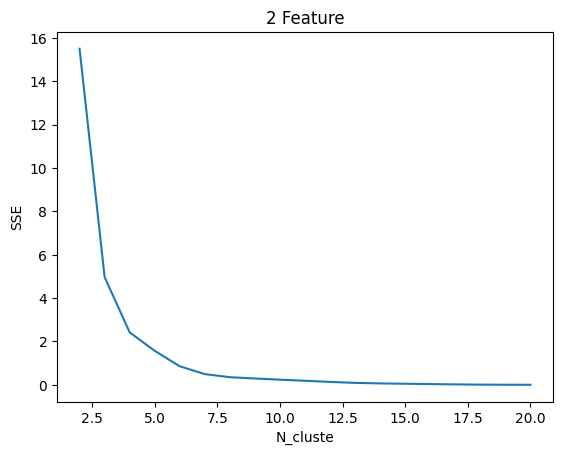

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
y = []
for i in range(2,21):
  model = KMeans(n_clusters=i)
  model.fit(data2_.drop(columns = 'patients'), data2_['patients'])
  y.append(model.inertia_)
plt.plot(x,y)
plt.ylabel("SSE")
plt.xlabel("N_cluste")
plt.title("2 Feature")

Text(0.5, 1.0, '10 Feature')

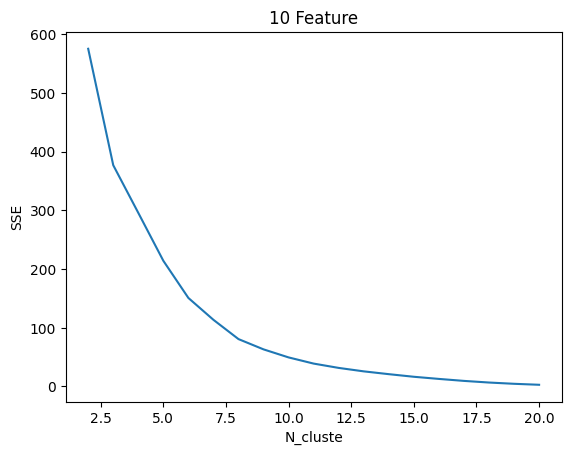

In [ ]:
y = []
for i in range(2,21):
  model = KMeans(n_clusters=i)
  model.fit(data10_.drop(columns = 'patients'), data10_['patients'])
  y.append(model.inertia_)
plt.plot(x,y)
plt.ylabel("SSE")
plt.xlabel("N_cluste")
plt.title("10 Feature")

Text(0.5, 1.0, '50 Feature')

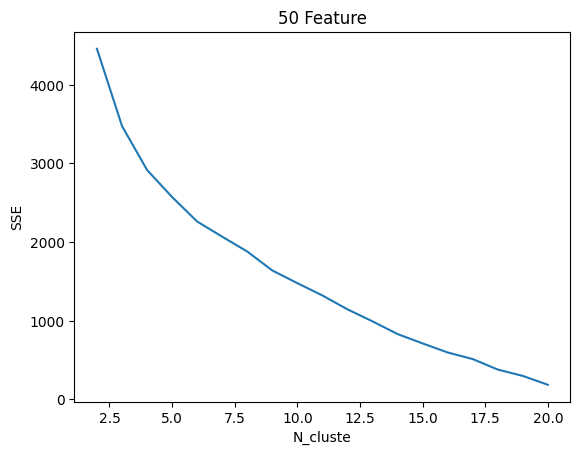

In [ ]:
y = []
for i in range(2,21):
  model = KMeans(n_clusters=i)
  model.fit(data50_.drop(columns = 'patients'), data50_['patients'])
  y.append(model.inertia_)
plt.plot(x,y)
plt.ylabel("SSE")
plt.xlabel("N_cluste")
plt.title("50 Feature")

Text(0.5, 1.0, '1000 Feature')

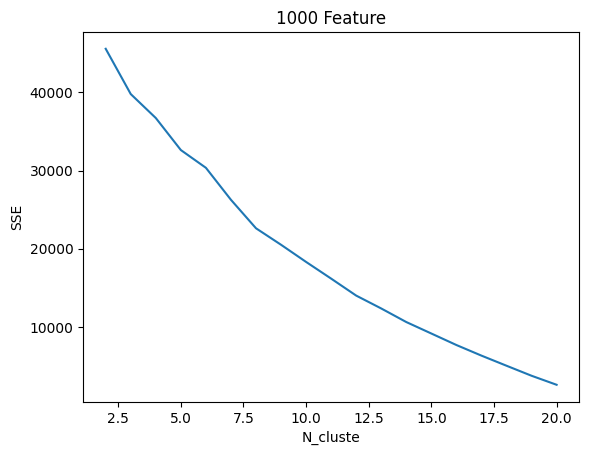

In [ ]:
y = []
for i in range(2,21):
  model = KMeans(n_clusters=i)
  model.fit(data1000_.drop(columns = 'patients'), data1000_['patients'])
  y.append(model.inertia_)
plt.plot(x,y)
plt.ylabel("SSE")
plt.xlabel("N_cluste")
plt.title("1000 Feature")

Text(0.5, 1.0, 'sklearn Kmeans')

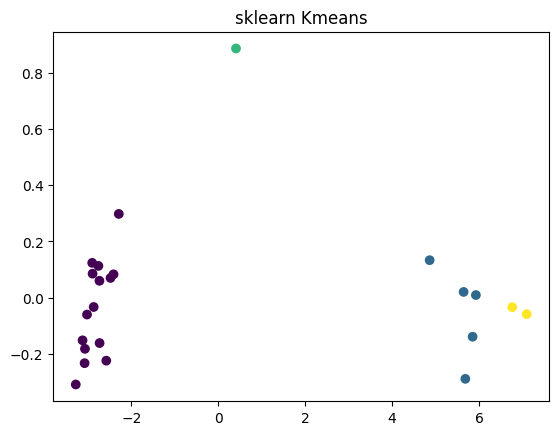

In [ ]:
dr = PCA(n_components=2, random_state=0)
d_data = dr.fit_transform(data2_.drop(columns='patients'))
model = KMeans(n_clusters=4, random_state=0, max_iter=50).fit(d_data)
skl_kmeans = model.labels_
plt.scatter(d_data[:, 0],
               d_data[:, 1],
               c=skl_kmeans)
plt.title("sklearn Kmeans")

Text(0.5, 1.0, 'sklearn Kmeans')

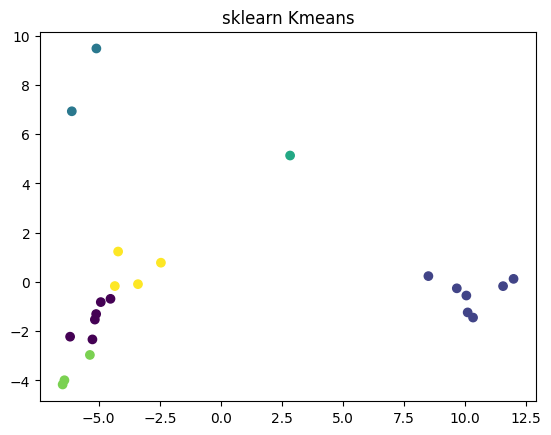

In [ ]:
dr = PCA(n_components=2, random_state=0)
d_data = dr.fit_transform(data10_.drop(columns='patients'))
model = KMeans(n_clusters=6, random_state=0, max_iter=50).fit(d_data)
skl_kmeans = model.labels_
plt.scatter(d_data[:, 0],
               d_data[:, 1],
               c=skl_kmeans)
plt.title("sklearn Kmeans")

Text(0.5, 1.0, 'sklearn Kmeans')

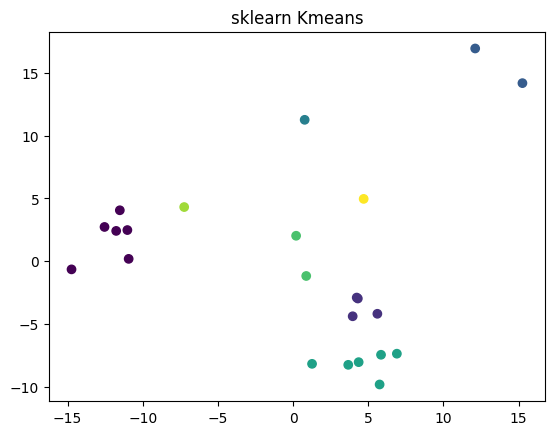

In [ ]:
dr = PCA(n_components=2, random_state=0)
d_data = dr.fit_transform(data50_.drop(columns='patients'))
model = KMeans(n_clusters=8, random_state=0, max_iter=50).fit(d_data)
skl_kmeans = model.labels_
plt.scatter(d_data[:, 0],
               d_data[:, 1],
               c=skl_kmeans)
plt.title("sklearn Kmeans")

Text(0.5, 1.0, 'sklearn Kmeans')

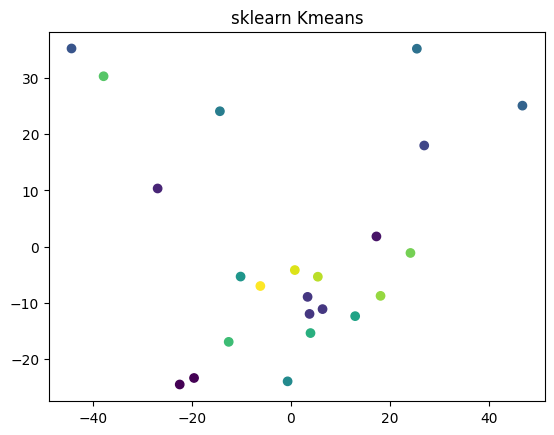

In [ ]:
dr = PCA(n_components=2, random_state=0)
d_data = dr.fit_transform(data1000_.drop(columns='patients'))
model = KMeans(n_clusters=20, random_state=0, max_iter=50).fit(d_data)
skl_kmeans = model.labels_
plt.scatter(d_data[:, 0],
               d_data[:, 1],
               c=skl_kmeans)
plt.title("sklearn Kmeans")

In [ ]:
model = KMeans(n_clusters=8, random_state=0, max_iter=50).fit(data50_[:23].drop(columns='patients'))
skl_kmeans = model.labels_
skl_kmeans
col_ = []
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
print("MARKER genes for every cluster : ")
for x in np.unique(skl_kmeans):
  idx = []
  for i in range(len(skl_kmeans)):
    if (skl_kmeans[i] == x):
      idx.append(i)
  temp1 = data50_[:23].iloc[idx].mean()
  temp2 = data50_[:23].iloc[list(set(r) - set(idx))].median()
  res_ = {}
  for col in data50_.columns:
    res_[col] = temp1[col] - temp2[col]
  sort_idx_data = dict(sorted(res_.items(), key=lambda item: item[1]))
  els = list(sort_idx_data.items())[::-1]
  print("for cluster ", x, " 10 genes that have most number is :")
  print(els[:10])
  print("----------------------------------------------------------")

MARKER genes for every cluster : 
for cluster  0  10 genes that have most number is :
[('201110_s_at', 5.4774920991653175), ('201417_at', 4.977130871313371), ('204409_s_at', 4.536565992724878), ('205758_at', 4.234310009732385), ('209686_at', 4.136526566120796), ('205000_at', 4.1036474642546175), ('225681_at', 3.8317885328325882), ('225846_at', 3.818948773238814), ('1555756_a_at', 3.7888787427871913), ('202859_x_at', 3.3093213123961416)]
----------------------------------------------------------
for cluster  1  10 genes that have most number is :
[('224588_at', 7.486418373801316), ('227671_at', 6.678945486481081), ('224590_at', 6.166160641152475), ('214218_s_at', 5.952959595656375), ('221728_x_at', 5.797016157516181), ('214464_at', 4.404794146632078), ('201417_at', 3.2963193467908596), ('201839_s_at', 3.1773140970070575), ('225846_at', 2.915747380683176), ('225681_at', 2.667951868577184)]
----------------------------------------------------------
for cluster  2  10 genes that have most 

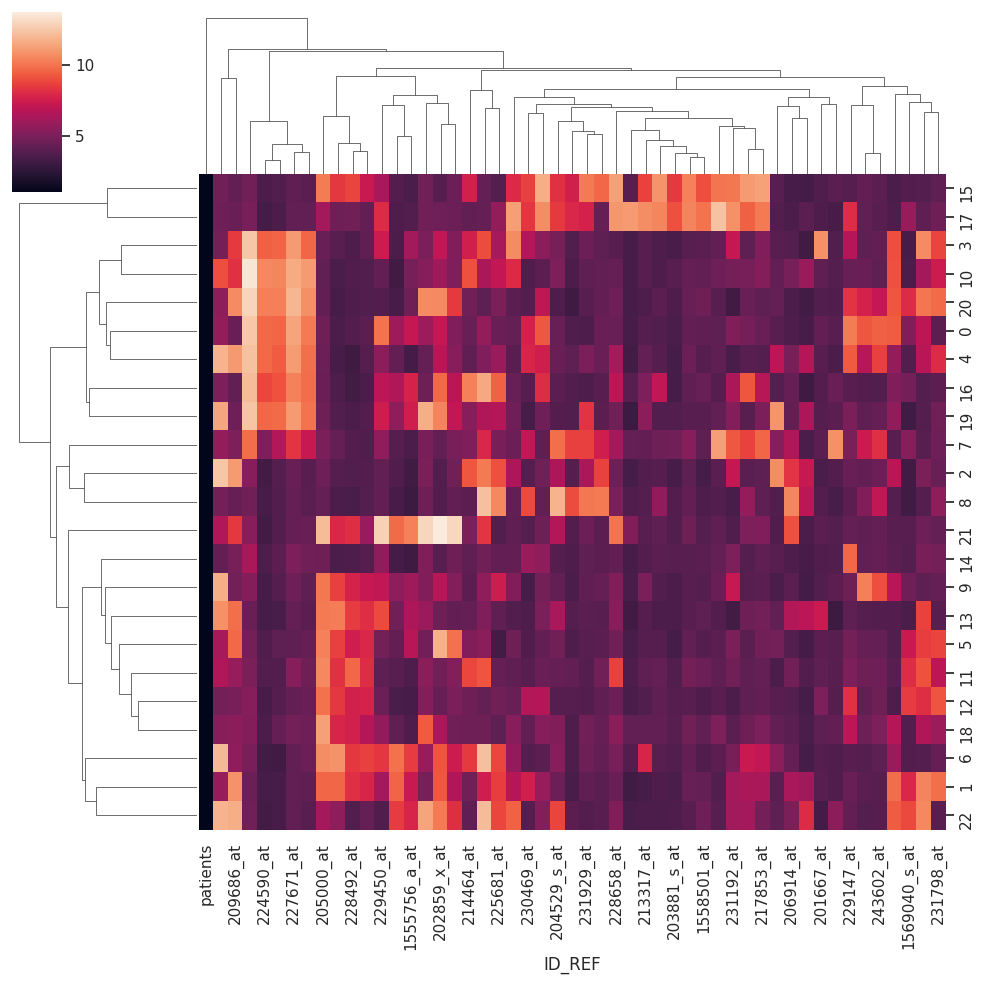

In [ ]:
import seaborn as sns
sns.set_theme(color_codes=True)
g = sns.clustermap(data50_)

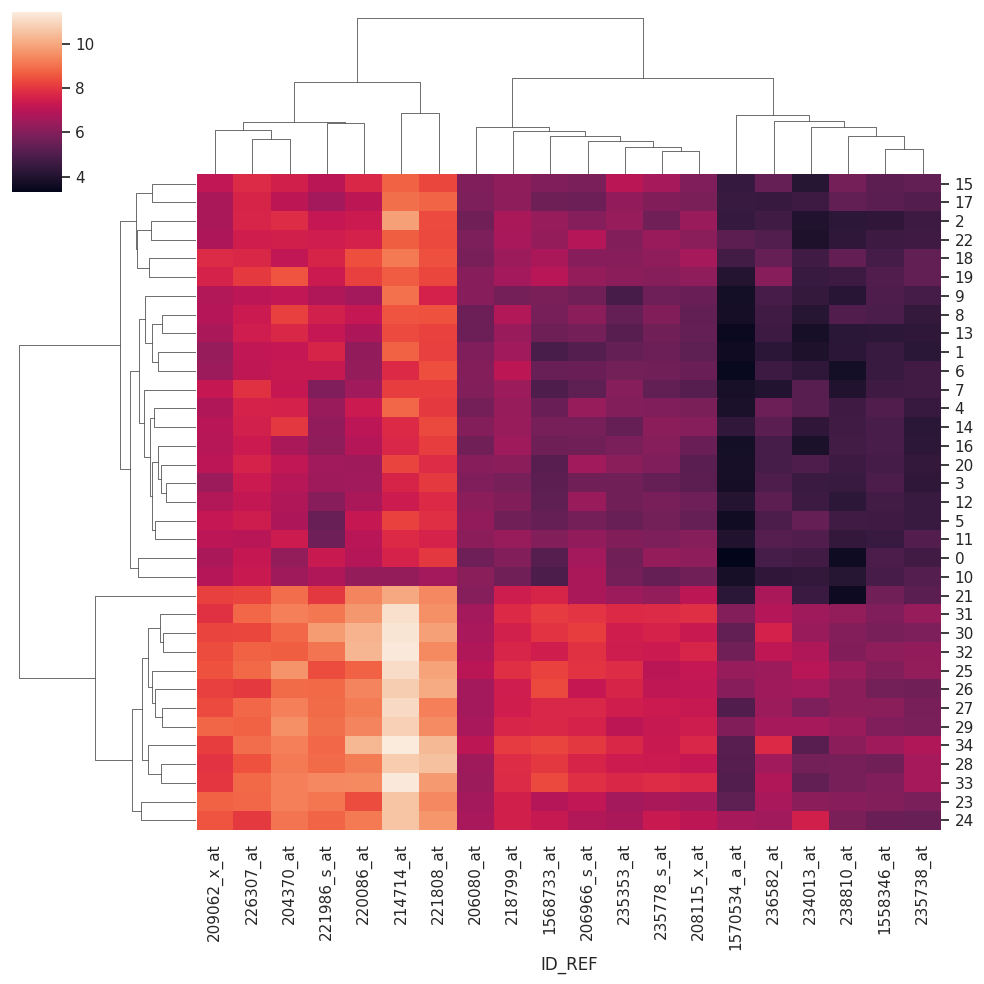

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k=20)
fs.fit(data.drop(columns=['Name', 'patients']), data['patients'])
temp = np.array(data.drop(columns=['Name', 'patients']).columns)
list_ = {}
for i in range(len(fs.scores_)):
  list_[temp[i]] = fs.scores_[i]
sort_idx_data = dict(sorted(list_.items(), key=lambda item: item[1]))
els = list(sort_idx_data.items())[::-1]
els
list_['220086_at']
temp2 = els[:20]
col = []
for a in temp2:
  col.append(a[0])
col
data_new = data[col]
import seaborn as sns
sns.set_theme(color_codes=True)
g = sns.clustermap(data_new)